In [173]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

%pylab inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
%matplotlib inline


from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [174]:
df=pd.read_csv("RedditSurveyData.csv")

In [175]:
df.columns

Index([u'Entry Id', u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Treated country data',
       u'(For U. S. redditors) In which state do you live?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?', u'Unnamed: 14',
       u'Unnamed: 15', u'Unnamed: 16', u'Unnamed: 17', u'Unnamed: 18',
       u'Unnamed: 19'],
      dtype='object')

In [176]:
#Lets do a quick data exploration
df.head(20)

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
df.shape

(32754, 20)

In [178]:
#Removing unwanted columns
del df['Unnamed: 14']
del df['Unnamed: 15']
del df['Unnamed: 16'] 
del df['Unnamed: 17'] 
del df['Unnamed: 18']
del df['Unnamed: 19']
#Lets look at the labels of the columns in the survey data
df.columns

Index([u'Entry Id', u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Treated country data',
       u'(For U. S. redditors) In which state do you live?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?'],
      dtype='object')

In [179]:
#Rename several DataFrame columns for the ease of using it further
df = df.rename(columns = {
    'Entry Id':'Entry_Id',
    'Please indicate your gender.':'Gender',
    'What is your marital status?':'Marital_status',
    'What best describes your employment status?':'Emp_status' ,   
    'Please select the category that includes your age.':'Age_category',
    'Are you or have you ever been in military service?':'Military_service',
    'Do you currently have children under the age of 18 living in your household?':'Home_children_und_18',
    'What best describes your level of education?':'Level_of_education',
    'Treated country data':'Country',
    '(For U. S. redditors) In which state do you live?':'State_live',
    'Which one of the following ranges includes your total yearly household income before taxes?':'Annual_income',
    'treated subreddit data':'Subreddit_category', 
    'Are you a dog or a cat person?':'Like_dog_or_cat',
    'If you were a cheese, what cheese would you be?':'Cheese_type'
    
    })

In [180]:
#Lets check the columns with new names
df.columns

Index([u'Entry_Id', u'Gender', u'Age_category', u'Marital_status',
       u'Emp_status', u'Military_service', u'Home_children_und_18',
       u'Level_of_education', u'Country', u'State_live', u'Annual_income',
       u'Subreddit_category', u'Like_dog_or_cat', u'Cheese_type'],
      dtype='object')

                   EDA on each of the variables of reddit data


In [181]:
df.Gender.value_counts()

Male      26418
Female     6135
None        201
Name: Gender, dtype: int64

Gender is a categorical variable

In [182]:
#Lets check if there are any null values
df[df.Gender.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Emp_status,Military_service,Home_children_und_18,Level_of_education,Country,State_live,Annual_income,Subreddit_category,Like_dog_or_cat,Cheese_type


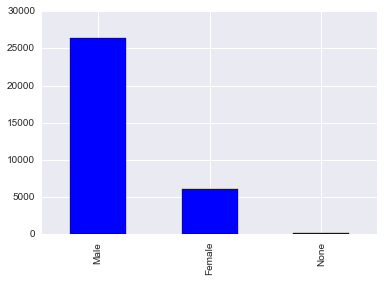

In [183]:
#Lets visualize
df.Gender.value_counts().plot(kind='bar')

In [184]:
#EDA on Age_category
df.Age_category.value_counts()

18-24          15802
25-34          11575
Under 18        2330
35-44           2257
45-54            502
55-64            140
None              88
65 or Above       60
Name: Age_category, dtype: int64

Age is a categorical variable

In [185]:
#lets check for missing values
df[df.Age_category.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Emp_status,Military_service,Home_children_und_18,Level_of_education,Country,State_live,Annual_income,Subreddit_category,Like_dog_or_cat,Cheese_type


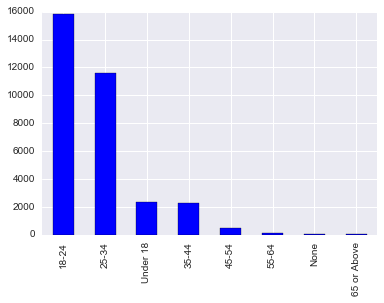

In [186]:
#Lets visualize
df.Age_category.value_counts().plot(kind='bar')

In [187]:
#EDA for Martial_status
df.Marital_status.value_counts()

Single                                      10428
In a relationship                            9828
Forever Alone                                5850
Married/civil union/domestic partnership     5490
Engaged                                      1109
Widowed                                        44
Blank                                           5
Name: Marital_status, dtype: int64

   Martial_status is a categorical varibale

In [188]:
df[df.Marital_status.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Emp_status,Military_service,Home_children_und_18,Level_of_education,Country,State_live,Annual_income,Subreddit_category,Like_dog_or_cat,Cheese_type


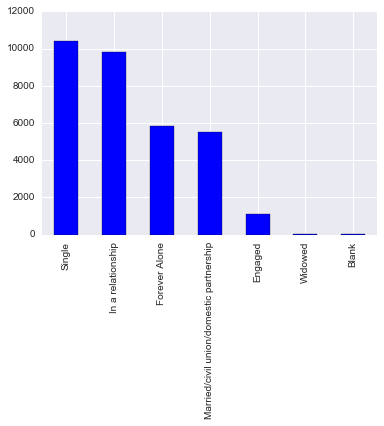

In [189]:
#Lets visualize
df.Marital_status.value_counts().plot(kind='bar')

In [190]:
#EDA on Emp_status
df.Emp_status.value_counts()

Employed full time                       14814
Student                                  12987
Not employed, but looking for work        2087
Freelance                                 1948
Not employed and not looking for work      682
None                                       151
Retired                                     85
Name: Emp_status, dtype: int64

In [191]:
df[df.Emp_status.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Emp_status,Military_service,Home_children_und_18,Level_of_education,Country,State_live,Annual_income,Subreddit_category,Like_dog_or_cat,Cheese_type


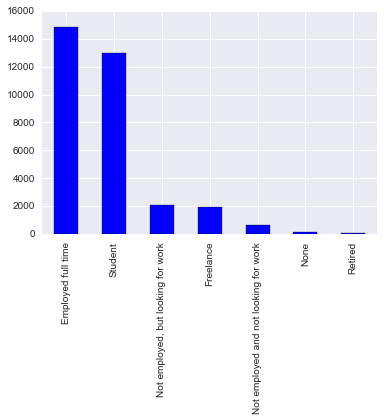

In [192]:
df.Emp_status.value_counts().plot(kind='bar')

In [193]:
#EDA on Home_children_und_18
df.Home_children_und_18.value_counts()

No      27488
Yes      5047
None      219
Name: Home_children_und_18, dtype: int64

Home_children_und_18 is a categorical varible

In [194]:
df[df.Home_children_und_18.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Emp_status,Military_service,Home_children_und_18,Level_of_education,Country,State_live,Annual_income,Subreddit_category,Like_dog_or_cat,Cheese_type


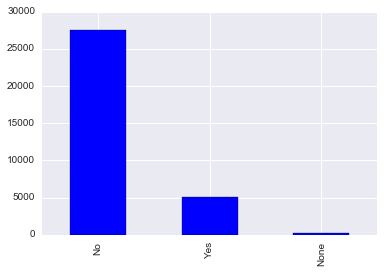

In [195]:
df.Home_children_und_18.value_counts().plot(kind='bar')

In [196]:
#EDA on level_of_education 
df.Level_of_education.value_counts()

Bachelor's degree                     11046
Some college                           9600
Graduate or professional degree        4722
High school graduate or equivalent     3272
Some high school                       1924
Associate degree                       1411
Trade or Vocational degree              635
None                                    144
Name: Level_of_education, dtype: int64

Level_of_education is categorical variable

In [197]:
df[df.Level_of_education.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Emp_status,Military_service,Home_children_und_18,Level_of_education,Country,State_live,Annual_income,Subreddit_category,Like_dog_or_cat,Cheese_type


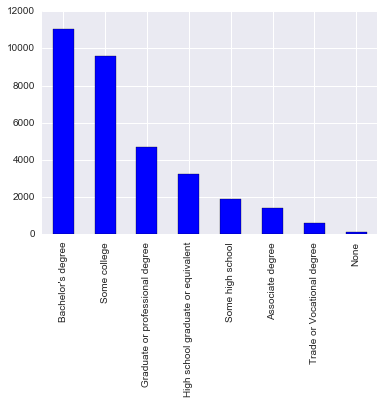

In [198]:
df.Level_of_education.value_counts().plot(kind='bar')

In [199]:
#EDA on Annual income
df.Annual_income.value_counts()

Under $20,000          7892
$50,000 - $69,999      4133
$70,000 - $99,999      4101
$100,000 - $149,999    3522
$20,000 - $29,999      3206
$30,000 - $39,999      2904
$150,000 or more       2695
$40,000 - $49,999      2686
none                   1615
Name: Annual_income, dtype: int64

Annual_income is a categorical variable

In [200]:
df[df.Annual_income.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Emp_status,Military_service,Home_children_und_18,Level_of_education,Country,State_live,Annual_income,Subreddit_category,Like_dog_or_cat,Cheese_type


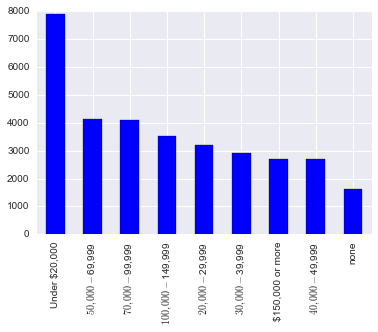

In [201]:
df.Annual_income.value_counts().plot(kind='bar')

In [202]:
#EDA on subreditt category
df.Subreddit_category.value_counts()

askreddit                                        2123
fffffffuuuuuuuuuuuu                              1746
pics                                             1651
trees                                            1311
gaming                                           1207
funny                                            1092
atheism                                           839
askscience                                        779
all                                               647
todayilearned                                     645
starcraft                                         611
iama                                              576
minecraft                                         520
f7u12                                             515
programming                                       501
twoxchromosomes                                   396
science                                           378
truereddit                                        347
wtf                         

In [203]:
df[df.Subreddit_category.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Emp_status,Military_service,Home_children_und_18,Level_of_education,Country,State_live,Annual_income,Subreddit_category,Like_dog_or_cat,Cheese_type
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster
13,14,Male,18-24,Forever Alone,Student,No,No,Some college,Romania,NaN,"Under $20,000",NaN,I like cats.,Swiss
29,30,Female,18-24,Forever Alone,Student,No,No,Some college,United States,Minnesota,none,NaN,I like dogs.,American
52,53,Male,25-34,Single,"Not employed, but looking for work",No,No,Bachelor's degree,United States,Texas,"$70,000 - $99,999",NaN,I like cats.,Provolone
61,62,Male,25-34,Single,Employed full time,Yes,No,Some college,romania,NaN,"$20,000 - $29,999",NaN,I like cats.,Other
75,76,Male,35-44,Single,Freelance,No,No,Some college,United Kingdom,NaN,"$70,000 - $99,999",NaN,I like cats.,Other
79,80,Male,25-34,Single,Employed full time,No,No,Bachelor's degree,United States,Texas,"$40,000 - $49,999",NaN,I like cats.,Brie
89,90,Male,18-24,Single,Student,No,No,Some college,United States,Colorado,"$150,000 or more",NaN,I like cats.,Brie
103,104,Male,25-34,In a relationship,Student,No,No,Bachelor's degree,United States,Massachusetts,"$20,000 - $29,999",NaN,I like dogs.,Goat
162,163,Female,25-34,Single,Student,No,No,Bachelor's degree,United States,Florida,"Under $20,000",NaN,I like turtles.,Goat


In [204]:
#There is lot of data with no category, so lets classify all of that to None
df['Subreddit_category'].fillna('missing',inplace=True)

In [205]:
#df.Subreddit_category.value_counts().plot(kind='bar')

In [206]:
#EDA on like_dog_or_cat
df.Like_dog_or_cat.value_counts()

I like dogs.       17149
I like cats.       11152
I like turtles.     4442
none                   5
askreddit              2
 Reddit.com            1
movies                 1
Name: Like_dog_or_cat, dtype: int64

In [207]:
#lets cleanup by removing movies,askreditt, reditt.com 
df.loc[df['Like_dog_or_cat'] == 'movies', 'Like_dog_or_cat'] = 'none'

In [208]:
#similarly lets do for askreditt and Reddit.com
df.loc[df['Like_dog_or_cat'] == 'askreddit', 'Like_dog_or_cat'] = 'none'
df.loc[df['Like_dog_or_cat'] == ' Reddit.com', 'Like_dog_or_cat'] = 'none'
#Lets change I like turtles to none
df.loc[df['Like_dog_or_cat'] == 'I like turtles', 'Like_dog_or_cat'] = 'none'
df.Like_dog_or_cat.value_counts()

I like dogs.       17149
I like cats.       11152
I like turtles.     4442
none                   9
Name: Like_dog_or_cat, dtype: int64

In [209]:
df[df.Like_dog_or_cat.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Emp_status,Military_service,Home_children_und_18,Level_of_education,Country,State_live,Annual_income,Subreddit_category,Like_dog_or_cat,Cheese_type
2705,2706,Male,18-24,Single,"Not employed, but looking for work",No,No,Bachelor's degree,United Kingdom,NaN,none,DROP TABLE `users`,NaN,1
30331,30334,Male,25-34,In a relationship,Employed full time,No,No,Bachelor's degree,Canada,NaN,"$70,000 - $99,999",DROP TABLE USERS,NaN,programming')


In [210]:
#We have two missing values, so lets categorize them as none
df['Like_dog_or_cat'].fillna('none',inplace=True)
#df.loc[df['Like_dog_or_cat'] == 'NaN', 'Like_dog_or_cat'] = 'none'

In [211]:
df[df.Like_dog_or_cat.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Emp_status,Military_service,Home_children_und_18,Level_of_education,Country,State_live,Annual_income,Subreddit_category,Like_dog_or_cat,Cheese_type


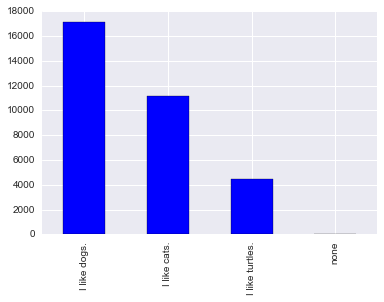

In [212]:
df.Like_dog_or_cat.value_counts().plot(kind='bar')

In [213]:
#EDA for Chesse_type
df.Cheese_type.value_counts()

Other            6562
Cheddar          6101
Brie             3742
Provolone        3454
Swiss            3214
Feta             2991
Goat             2516
Munster          1770
American         1438
Paneer            618
Limburger         337
none                5
 f7u12              2
1                   1
programming')       1
 awww               1
 Pics               1
Name: Cheese_type, dtype: int64

Cheese_type is a categorical variable


In [214]:
df[df.Cheese_type.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Emp_status,Military_service,Home_children_und_18,Level_of_education,Country,State_live,Annual_income,Subreddit_category,Like_dog_or_cat,Cheese_type


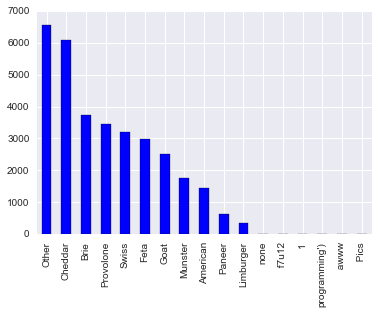

In [215]:
df.Cheese_type.value_counts().plot(kind='bar')

In [216]:
#EDA for military_service
df.Military_service.value_counts()

No      30526
Yes      2223
none        5
Name: Military_service, dtype: int64

In [217]:
#lets check null values
df[df.Military_service.isnull()]

,Entry_Id,Gender,Age_category,Marital_status,Emp_status,Military_service,Home_children_und_18,Level_of_education,Country,State_live,Annual_income,Subreddit_category,Like_dog_or_cat,Cheese_type


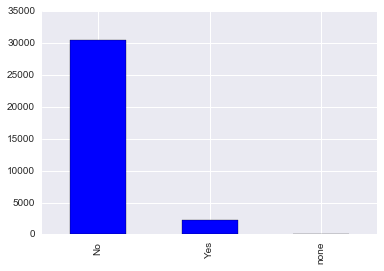

In [218]:
#Lets visulaize
df.Military_service.value_counts().plot(kind='bar')

In [219]:
#Lets drop Entry_Id and State column from the data frame
del df['State_live']
del df['Entry_Id']

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32754 entries, 0 to 32753
Data columns (total 12 columns):
Gender                  32754 non-null object
Age_category            32754 non-null object
Marital_status          32754 non-null object
Emp_status              32754 non-null object
Military_service        32754 non-null object
Home_children_und_18    32754 non-null object
Level_of_education      32754 non-null object
Country                 32754 non-null object
Annual_income           32754 non-null object
Subreddit_category      32754 non-null object
Like_dog_or_cat         32754 non-null object
Cheese_type             32754 non-null object
dtypes: object(12)
memory usage: 3.2+ MB


In [222]:
EuropeDump=['United kingom','United kingdom ','Croatua','switzerland','ITALY IT','england','England','SPAIN','Itaky',
        'Scotland and Sweden','NORWAY', 'DENMARK',
       'United kingdom of great britain and northern Ireland','Unitd Kingdom',
        'british virgin islands','BG','Denmark ','Serbia','serbia','UNited Kingdom','Galiza','The Netherlands','Netherlands, the',
       'Belgrium', 'slovenia','united kingdom / scotland', 'United Kingdom of Great Britain','uk','Czech republic',
        'United Kingdo,','Great Britian ','the Netherlands (a.k.a. Holland)',
        'Slovak Republic','Norway.','Australia and United Kingdom','IRELAND','England (United Kingdom is not a country)',
        'Bosnia And Herzegovina','Catalonia','new Zealand ','Newzealand ', 'FUNLAND','Belgrium','slovenia',
        'Republic of Ireland','Republic of Ireland ','BELGIUM','Peoples Republic of South Yorkshire',
        'United Kingdon', 'wales','norway', 'Swedeb','Netehrlands','Kingdom of Norway',
         'Holland','Federal Republic of Germany','United Kingdom (England)', 'United KIngdom',
        'England','Scotland','FRANCE','romania','Northern Ireland','sweden','Sweden',
        'Federal Republic of Germany','The NEtherlands','denmark','FUNLAND','Belgrium','Nether',
        'Commonwealth of the Northern Mariana Islands','Helsinki','U.K lol', 'scotland',
        'UK','U.K.','estonia','London United Kingdom','Frande','poland', 'U.K. Problem?',
        'Lithuania/United Kingdom','Kosova','Kosovo','U.K','United ','Denmark','United Kingdom','Belgium','Italy','italy','Romania',
           'Germany', 'France', 'Greece', 'Switzerland','Netherlands', 'Bulgaria', 'Spain', 'Poland', 'Finland',
         'the Netherlands','Slovenia','Iceland','Bosnia and Herzegovina','Croatia','united kingdom',
          'New Zealand','Estonia','Puerto Rico','Portugal','Slovakia','Ukraine', 'Macedonia','Czech Republic',
        'Lithuania','United Kingdom (Scotland)','Swiss','Bermuda','Dominica','United Jingdom', 'Gibraltar', 'ireland',
         'Hungary','Uninted Kingdom','Isle of Man','Luxembourg','Swedem','Wales', 'Latvia', 'POLAND',
           'u.k', 'United  Kingdom', 'spain', 'germany','new zealand','Equestria',
           'United Kingdom of Great Britain and Northern Ireland','Republic of Poland', 'Honduras','ENGLAND', 'GErmany', 'greece',  
         'Ger','finland','iceland','belgium', 'Sweden ','Republic Of Ireland','England ','Great Britain','New zealand', 'New Zealand ',
        'The United Kingdom of Great Britain and Northern Ireland','Albania',
        'Grand Duchy of Baden','United Kingdown','Faroe Islands','Portugal',
       'Untied Kingdom ', 'The Czech Republic','Montenegro','Antigua and Barbuda','United Kindom',' United Kingdom',
        'The Republic of Ireland', 'Australia ','Andorra','czech republic','Untied Kingdom','St.Vincent', 'Ireland ',
        'united kingdom of great Britain ','UNITED KINGDOM','united kingdom ','Unted Kingdom','New Zealanad','United Knigdom', 
        'Finland ', 'netherlands','The Netherlands ','Bosnia and Herzegowina','united kingdom, Spain ',
        'ITALY','croatia','Belarus','United Kingdom, India','Portugal ',
          'Ireland','United Kingdom ','Malta','france','United kingdom,England, United Kingdom','United kingdom',
            'England, United Kingdom','Germany ','Republic of Moldova','the netherlands',
            'United Kingdom of Great Britain & Northern Ireland','Frabce','Swden','Moldova']

North_America=['United States','canada','Trinidad and TObago','Commonwealth of the Northern Mariana Islands',
               'Republic of the Marshall Islands','united states of America ','Amurika',
               'Belgium/Canada','america','haiti','United Strate','Canada, Eh','United s',
               'The Dominion of Canada','United States (Guam)','Ontario, Canada','united states (my state is APO) ',
               'Mx','Mexico','mexico','Canada, Bitches.','United States of America (Washington, DC)',
               'United States of America (WASHINGTON DC, Y U NO LISTED?)','US OF A','U.S','USA ','California',
               "United States (apparently I can't put D.C. as my state)",'united states', 'united states :f',
               'United States, District of Columbia','U S A','USVI','america','united Sr','Idaho'
               ,'Canada (currently Korea)','Canada','CANADA','Norway',
               'United states of America. ','Costa Rica','M\xc3\xa9xico','Barbados','Canada, eh?',
                'United states of America', 'United States of ', 
                'United States of America (DC)','Trinidad & Tobago',
                'Belize','Dominion of Canada', 'Toronto','El Salvador','Canadia','Trinidad and Tobago',
                'Cayman Islands','Amerikka', 'Guatemala','United States ', 'US','united stateds','Amerikka', 'Guatemala','MEXICO  ',
               'United States of America: Guam. No option for territories :(','United states',
                'Sint Maarten','united sates','The United States of America','Usa', 'United st','Mexico ',
                'united States','Unnited States','Bahamas',' Canada','canada ', 'United States of America ', 
                'United States Of America', 'Guam', 'usa','greenland','Camada','U.S.A.','Canda','Unites States','Panama',
              'United Sates','Canada ','united states of america','United States of America', 'Cananda',
              'United States of American','United States (Washington, DC)','united states of American', 
               'Nicaragua','MEXICO','USA',' Canada eh']

Africa=['kenya','Algeria','Egypt','Libyan Arab Jamahiriya','Morocco','Tunisia','Western Sahara','Burundi'
        ,'Comoros','Djibouti','Eritrea','Ethiopia','Kenya','Madagascar','Malawi','Mauritius','Mayotte',
        'Mozambique','Réunion','Rwanda','Somalia','Sudan','Uganda','United Republic of Tanzania','Zambia',
        'Zimbabwe','Angola','Cameroon','Central African Republic','Chad','Congo','Democratic Republic of the Congo',
        'Equatorial Guinea','Gabon','Sao Tome and Principe','Botswana','Lesotho','Namibia','South Africa','Swaziland',
        'Benin','Burkina Faso','Cape Verde',"Côte d'Ivoire",'Gambia','Ghana','Guinea','Guinea-Bissau','Liberia','Mali',
        'Mauritania','Niger','Nigeria','Senegal','Sierra Leone','Togo','Jamaica', 'Dominican Republic','south africa','Aruba','Tanzania']

Asia=['North Korea','kuwait','Hong Kong, China','Republic Of Korea (American Citizen)','Singapore ',"People's Republic of China",
      'INDIA','South Korea ','philippines','china','malaysia','Hong KOng','Hong Kong Special Administrative Region, China', 'ISRAEL',
      'PHIILIPPINES','TURKEY','israel', 'Lebanon ','Republic of Macedonia','Iraq, Kurdistan','india','MALAYSIA','Indiia',
      'israel', 'Lebanon ','Japan ','lebanon','turkey','taiwan','JAPAN','SIngapore',"People's Republic of China",'japan',
      'Iran','Armenia','Azerbaijan','Bahrain','Cyprus','Georgia','Iraq','Israel','Jordan','Kuwait','Lebanon','Occupied Palestinian Territory',
      'Oman','Qatar','Saudi Arabia','Syrian Arab Republic','Turkey','United Arab Emirates','Yemen','Afghanistan',
      'Bangladesh','Bhutan','Iran','Maldives','Nepal','Pakistan','Sri Lanka','Brunei Darussalam','Cambodia','Indonesia',
      "Lao People's Democratic Republic",'Malaysia','Myanmar','Philippines','Singapore','Thailand',
      'Timor-Leste','Viet Nam','China','Macao',"Democratic People's Republic of Korea",'Mongolia',
      'Republic of Korea','Kazakhstan','Kyrgyzstan','Tajikistan','Turkmenistan','Uzbekistan',
     'India','thailand','Korea, South','Japan','Hong','Brunei','Russia','Palestine', 'Taiwan',
      'Russian Federation','United Arab Emarites','South Korea','SINGAPORE!','singapore','Hong Kong',
      'Vietnam','Kingdom of Saudi Arabia','SV','Hong Kong ','Brunei Darussalem','Kuwait ']

South_America=['brazil','Brasil','chile','Uruguay ','venezuela','Chile','Argentina','Bolivia','Brazil','Colombia','Ecuador',
               'French Guiana','Guyana','Paraguay','Peru','Suriname','argentina','colombia','Venezuela','ecuador','Brazilf','Uruguay']

Australia=['Ozstralia','Austrailia','Australia','australia','Australia','australia','Australi','austria',
           'Austraila','AUSTRALIA','Austrailia','Ozstralia','Australi','Australia','Austria', 'australia','austria',
           'AUSTRALIA', 'Austrailia', 'Austraila','Ozstralia','Australi'] 

Oceania=['Fiji','Papua New Guinea'] 
         
Antarctica=['Antarctica']
       

In [223]:
#print((pd.unique(Europe)),(Europe))
Europe=pd.unique(EuropeDump)
"Denmark" in Europe
#Europe

True

In [224]:
#Europe

In [225]:
#now lets have a column with continent name for each country
#from incf.countryutils import transformations

# Create a list to store the data
Continent = []
dumpList=[]
# For each row in the column,
for i in df['Country']:
    cont=''
    try:
        cont=transformations.cn_to_ctn(i)
        Continent.append[cont]
    except:
        if(i in EuropeDump):
            cont="Europe"
            Continent.append(cont)
        elif(i in North_America):
            cont="North America"
            Continent.append(cont)
        elif(i in South_America):
            cont="South America"
            Continent.append(cont)
        elif(i in Africa): 
            cont="Africa"
            Continent.append(cont)
        elif(i in Asia):
            cont="Asia"
            Continent.append(cont)
        elif(i in Oceania):
            cont="Oceania"
            Continent.append(cont)
        elif(i in Antarctica):
            cont="Antarctica"
            Continent.append(cont)
        elif(i in Australia):
            cont="Australia"
            Continent.append(cont)
        else:
            cont="None"
            Continent.append(cont) 
            dumpList.append(i)

In [226]:
# Create a column from the list
df['Continent'] = Continent


In [227]:
df[df.Continent=="None"]
#pd.unique(dumpList)
#len(pd.unique(dumpList))


,Gender,Age_category,Marital_status,Emp_status,Military_service,Home_children_und_18,Level_of_education,Country,Annual_income,Subreddit_category,Like_dog_or_cat,Cheese_type,Continent
401,Female,18-24,In a relationship,Employed full time,No,No,Some college,none,"$20,000 - $29,999",missing,I like cats.,Other,None
911,Male,18-24,In a relationship,Student,No,No,Some college,none,"$30,000 - $39,999",missing,I like turtles.,Goat,None
1045,Male,18-24,In a relationship,Student,No,Yes,Bachelor's degree,none,none,missing,I like dogs.,Munster,None
1103,Male,Under 18,Single,Student,No,No,Some high school,none,none,missing,I like dogs.,Munster,None
1187,Male,25-34,Single,Student,No,No,Bachelor's degree,none,"Under $20,000",truereddit,I like dogs.,Munster,None
1565,None,None,Forever Alone,None,Yes,None,None,none,"$70,000 - $99,999","tf2, ireland",I like dogs.,Goat,None
1895,Male,18-24,In a relationship,Student,No,No,Graduate or professional degree,n,none,missing,I like dogs.,Munster,None
2164,Male,18-24,Forever Alone,Employed full time,No,No,High school graduate or equivalent,none,"$40,000 - $49,999",funny,I like cats.,Other,None
2337,Male,25-34,In a relationship,Employed full time,No,No,Some college,none,none,missing,I like dogs.,Munster,None
2894,Male,35-44,Single,Employed full time,No,None,Some college,http://www.reddit.com/r/funny/comments/iocz1/m...,"$40,000 - $49,999",missing,I like turtles.,Brie,None


In [228]:
# Get just the numeric variables by selecting only the variables that are not "object" datatypes.
numeric_variables = list(df.dtypes[df.dtypes != "object"].index)
df[numeric_variables].head()

""
0
1
2
3
4


### note here, I have to handle y, military service, to make it numeric!

In [229]:
#sometimes military service is unknown.  I'm going to drop those rows, because I don't want to 
#impute a dependent variable.

df = df[ -(df.Military_service == 'none')]  #df where military service does NOT ( - ) == none

In [230]:
y=df['Military_service']
df = df.drop(['Military_service'], axis=1)

In [231]:
y.head()# now we need to make this 0/1

5    No
6    No
7    No
8    No
9    No
Name: Military_service, dtype: object

In [232]:
y = y.replace(to_replace=['No', 'Yes'], value=[0,1])

In [233]:
# Here is a simple function to show descriptive stats on the categorical variables
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))
    
describe_categorical(df)

,Gender,Age_category,Marital_status,Emp_status,Home_children_und_18,Level_of_education,Country,Annual_income,Subreddit_category,Like_dog_or_cat,Cheese_type,Continent
count,32749,32749,32749,32749,32749,32749,32749,32749,32749,32749,32749,32749
unique,3,8,6,7,3,8,440,9,1834,4,16,9
top,Male,18-24,Single,Employed full time,No,Bachelor's degree,United States,"Under $20,000",missing,I like dogs.,Other,North America
freq,26415,15801,10428,14811,27483,11042,20962,7891,4335,17149,6562,24592


In [234]:
# Drop the variables which we are not going to consider for our model
del df["Subreddit_category"]
del df["Like_dog_or_cat"]
del df["Cheese_type"]
del df["Country"]
#df.columns

In [235]:
categorical_variables = ['Home_children_und_18', 'Level_of_education', 'Annual_income','Emp_status',
                         'Marital_status','Age_category','Gender','Continent']

for variable in categorical_variables:
    # Create array of dummies
    dummies = pd.get_dummies(df[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    df = pd.concat([df, dummies], axis=1)
    df.drop([variable], axis=1, inplace=True)

In [236]:
df.isnull().sum()  #no more nulls, all numeric!

Home_children_und_18_No                                    0
Home_children_und_18_None                                  0
Home_children_und_18_Yes                                   0
Level_of_education_Associate degree                        0
Level_of_education_Bachelor's degree                       0
Level_of_education_Graduate or professional degree         0
Level_of_education_High school graduate or equivalent      0
Level_of_education_None                                    0
Level_of_education_Some college                            0
Level_of_education_Some high school                        0
Level_of_education_Trade or Vocational degree              0
Annual_income_$100,000 - $149,999                          0
Annual_income_$150,000 or more                             0
Annual_income_$20,000 - $29,999                            0
Annual_income_$30,000 - $39,999                            0
Annual_income_$40,000 - $49,999                            0
Annual_income_$50,000 - 

In [237]:
# Look at all the columns in the dataset
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(df)


,Home_children_und_18_No,Home_children_und_18_None,Home_children_und_18_Yes,Level_of_education_Associate degree,Level_of_education_Bachelor's degree,Level_of_education_Graduate or professional degree,Level_of_education_High school graduate or equivalent,Level_of_education_None,Level_of_education_Some college,Level_of_education_Some high school,Level_of_education_Trade or Vocational degree,"Annual_income_$100,000 - $149,999","Annual_income_$150,000 or more","Annual_income_$20,000 - $29,999","Annual_income_$30,000 - $39,999","Annual_income_$40,000 - $49,999","Annual_income_$50,000 - $69,999","Annual_income_$70,000 - $99,999","Annual_income_Under $20,000",Annual_income_none,Emp_status_Employed full time,Emp_status_Freelance,Emp_status_None,Emp_status_Not employed and not looking for work,"Emp_status_Not employed, but looking for work",Emp_status_Retired,Emp_status_Student,Marital_status_Engaged,Marital_status_Forever Alone,Marital_status_In a relationship,Marital_status_Married/civil union/domestic partnership,Marital_status_Single,Marital_status_Widowed,Age_category_18-24,Age_category_25-34,Age_category_35-44,Age_category_45-54,Age_category_55-64,Age_category_65 or Above,Age_category_None,Age_category_Under 18,Gender_Female,Gender_Male,Gender_None,Continent_Africa,Continent_Antarctica,Continent_Asia,Continent_Australia,Continent_Europe,Continent_None,Continent_North America,Continent_Oceania,Continent_South America
5,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
7,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
8,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
9,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32749,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
32750,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
32751,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
32752,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [243]:
#Lets compute the co-relation matrix
df.corr()

,Home_children_und_18_No,Home_children_und_18_None,Home_children_und_18_Yes,Level_of_education_Associate degree,Level_of_education_Bachelor's degree,Level_of_education_Graduate or professional degree,Level_of_education_High school graduate or equivalent,Level_of_education_None,Level_of_education_Some college,Level_of_education_Some high school,...,Gender_None,Continent_Africa,Continent_Antarctica,Continent_Asia,Continent_Australia,Continent_Europe,Continent_None,Continent_North America,Continent_Oceania,Continent_South America
Home_children_und_18_No,1.000000,-0.187444,-0.975108,-0.011509,0.076934,0.013320,-0.051520,-0.056340,0.035520,-0.145503,...,-0.031588,0.002216,0.003421,0.010663,-0.008776,0.014388,-0.042271,-0.006273,-0.004496,0.003771
Home_children_und_18_None,-0.187444,1.000000,-0.035022,-0.011875,-0.003836,-0.004882,-0.008596,0.283336,-0.017442,-0.006160,...,0.195028,-0.005279,-0.000641,0.002332,-0.005385,-0.007810,0.206806,-0.028114,-0.000785,0.000491
Home_children_und_18_Yes,-0.975108,-0.035022,1.000000,0.014390,-0.077409,-0.012451,0.054358,-0.006637,-0.032202,0.149428,...,-0.011886,-0.001063,-0.003336,-0.011375,0.010144,-0.012876,-0.003675,0.012728,0.004751,-0.003948
Level_of_education_Associate degree,-0.011509,-0.011875,0.014390,1.000000,-0.151339,-0.087097,-0.070696,-0.014102,-0.136636,-0.053013,...,-0.001271,-0.006611,-0.001658,-0.019888,-0.023939,-0.048693,-0.000949,0.063441,-0.002031,-0.011588
Level_of_education_Bachelor's degree,0.076934,-0.003836,-0.077409,-0.151339,1.000000,-0.292751,-0.237623,-0.047398,-0.459263,-0.178187,...,-0.008908,-0.001530,0.002692,0.042086,0.005264,-0.027662,-0.014553,0.013188,-0.000078,-0.021531
Level_of_education_Graduate or professional degree,0.013320,-0.004882,-0.012451,-0.087097,-0.292751,1.000000,-0.136754,-0.027278,-0.264309,-0.102548,...,0.005585,0.022432,-0.003208,0.044759,-0.007895,0.077116,-0.000455,-0.090621,-0.003929,0.034384
Level_of_education_High school graduate or equivalent,-0.051520,-0.008596,0.054358,-0.070696,-0.237623,-0.136754,1.000000,-0.022141,-0.214537,-0.083237,...,-0.005322,0.003992,0.010426,-0.000263,0.038798,0.084780,0.005685,-0.092770,-0.003189,0.006541
Level_of_education_None,-0.056340,0.283336,-0.006637,-0.014102,-0.047398,-0.027278,-0.022141,1.000000,-0.042793,-0.016603,...,0.213411,-0.004276,-0.000519,-0.008309,-0.005085,0.002231,0.281310,-0.046028,-0.000636,-0.001179
Level_of_education_Some college,0.035520,-0.017442,-0.032202,-0.136636,-0.459263,-0.264309,-0.214537,-0.042793,1.000000,-0.160875,...,-0.017964,-0.017348,-0.005032,-0.060208,-0.035371,-0.074764,-0.022332,0.109336,-0.006163,-0.000992
Level_of_education_Some high school,-0.145503,-0.006160,0.149428,-0.053013,-0.178187,-0.102548,-0.083237,-0.016603,-0.160875,1.000000,...,-0.007995,0.004193,-0.001952,-0.010020,0.003474,0.001653,-0.009360,0.001268,0.024744,0.000692


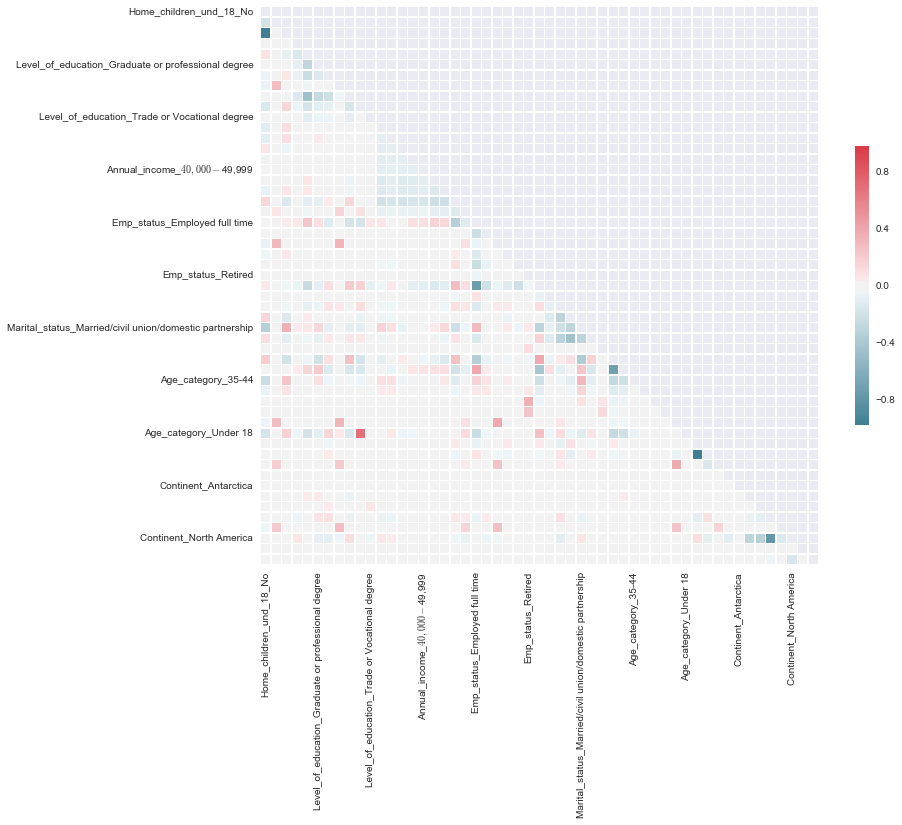

In [244]:
#lets plot the variables to understand which variables are highly collinear
import seaborn as sn 

#Lets calculate the corelation matrix 
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,square=True, 
            xticklabels=5, yticklabels=5,linewidths=.5, 
            cbar_kws={"shrink": .5}, ax=ax)


In [245]:
#X_train, X_test, y_train, y_test = train_test_split(df, y)

In [301]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
#model.fit(X_train, y_train)
model.fit(df,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [302]:
#roc = roc_auc_score(y_test, model.predict(X_test))
#print ("AUC Score: ", roc)
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

C-stat:  0.63021447702


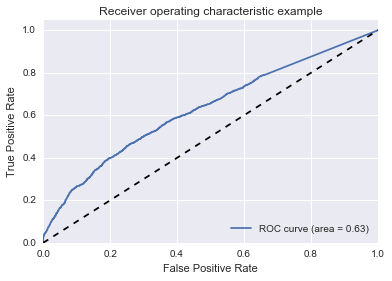

In [303]:
#fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))

fpr, tpr, thresholds= roc_curve(y, model.oob_prediction_)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

C:\Users\sunil\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  app.launch_new_instance()


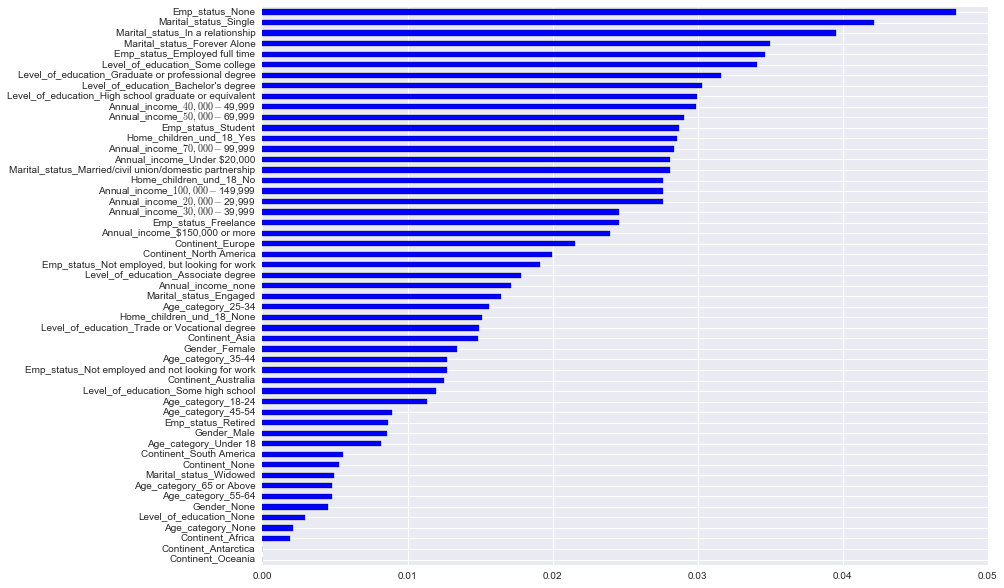

In [304]:
# Simple version that shows all of the variables
feature_importances = pd.Series(model.feature_importances_, index=df.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(13,10));

In [ ]:
 #%%timeit
#model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
#model.fit(df, y)

In [305]:
#%%timeit
#model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
#model.fit(df, y)

30 trees
C-stat:  0.621416957482

50 trees
C-stat:  0.629195722007

100 trees
C-stat:  0.63021447702

200 trees
C-stat:  0.633028733955

500 trees
C-stat:  0.634747157272

1000 trees
C-stat:  0.635684398032



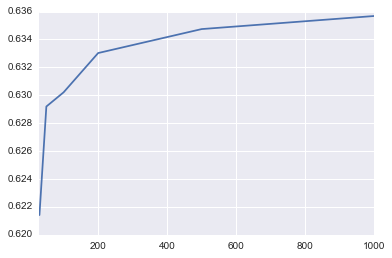

In [306]:
#lets check the results for different estimator values 
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(df, y)
    print trees, "trees"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

auto option
C-stat:  0.635684398032

None option
C-stat:  0.635684398032

sqrt option
C-stat:  0.636317369508

log2 option
C-stat:  0.635871166837

0.9 option
C-stat:  0.635642929875

0.2 option
C-stat:  0.635483357049



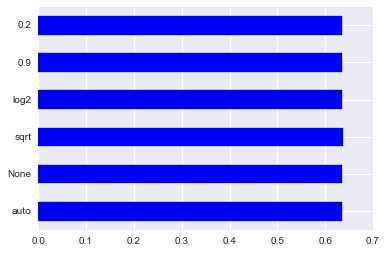

In [307]:
#lets check the max_features to be considered for best split
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(df, y)
    print max_features, "option"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, max_features_options).plot(kind="barh");

1 min samples
C-stat:  0.635684398032

2 min samples
C-stat:  0.649423605885

4 min samples
C-stat:  0.663808738487

6 min samples
C-stat:  0.669899259789

8 min samples
C-stat:  0.673474075727

10 min samples
C-stat:  0.676380258163

50 min samples
C-stat:  0.695592452194

100 min samples
C-stat:  0.700963565818

150 min samples
C-stat:  0.694665003755

200 min samples
C-stat:  0.692239418687



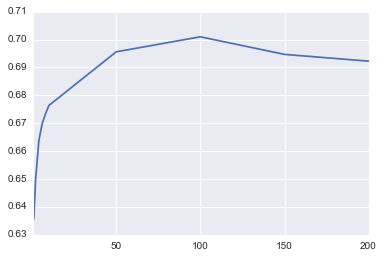

In [323]:
#Lets check results for different size of Minimum sample leaves 
results = []
min_samples_leaf_options = [1,2,4,6,8,10,50,100,150,200]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(df, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

In [404]:
#Final model
#Based on the min samples observations above we will set it to the parameter to 100

model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=100)
model.fit(df, y)
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc

C-stat:  0.700963565818


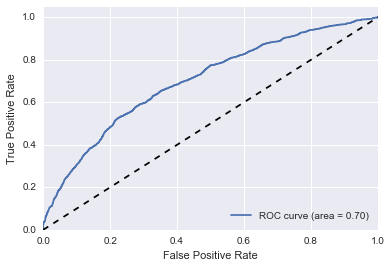

In [407]:
#Lets plot model score to understand the area under the curve
fpr, tpr, thresholds= roc_curve(y, model.oob_prediction_)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()